# Mathematical Underpinnings - Lab 4

In [1]:
from scipy.stats import chi2_contingency
from scipy.stats import chi2
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde, pearsonr
from scipy import stats
from sklearn.feature_selection import mutual_info_classif
from sklearn.metrics import mutual_info_score
import seaborn as sns
import pandas as pd

## Task 1

### a)

#### bp 1)

In [2]:
# a heatmap
# you may use pcolormesh function and draw a heatmap for a sample
# or draw a heatmap for a teoretic density function

# I give you an answer to that task, because it may take too much time to do it during labs. 

In [3]:
def plot_xyz(data_2d, nbins=300):
    x = data_2d[:, 0]
    y = data_2d[:, 1]
    k = gaussian_kde([x, y])
    xi, yi = np.mgrid[x.min():x.max():nbins * 1j, y.min():y.max():nbins * 1j]
    zi = k(np.vstack([xi.flatten(), yi.flatten()]))
    return xi, yi, zi

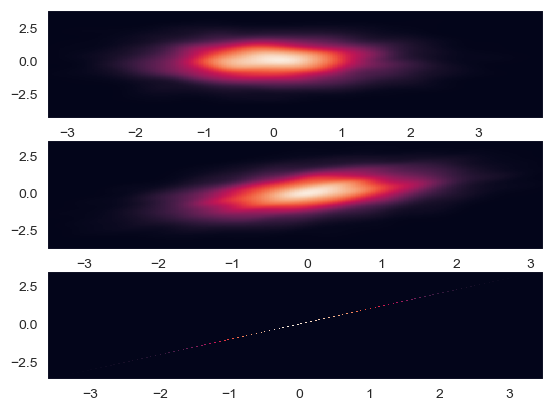

In [4]:
fig, axs = plt.subplots(3)

n = 5000

data_2d = np.random.multivariate_normal(np.zeros(2), np.array([[1, 0], [0, 1]]), n)
xi_0, yi_0, zi_0 = plot_xyz(data_2d)
data_2d = np.random.multivariate_normal(np.zeros(2), np.array([[1, 0.5], [0.5, 1]]), n)
xi_1, yi_1, zi_1 = plot_xyz(data_2d)
data_2d = np.random.multivariate_normal(np.zeros(2), np.array([[1, 1], [1, 1]]), n)
xi_2, yi_2, zi_2 = plot_xyz(data_2d)

# Make the plot
axs[0].pcolormesh(xi_0, yi_0, zi_0.reshape(xi_0.shape), shading='auto')
axs[1].pcolormesh(xi_1, yi_1, zi_1.reshape(xi_1.shape), shading='auto')
axs[2].pcolormesh(xi_2, yi_2, zi_2.reshape(xi_2.shape), shading='auto')
plt.show()

#### bp 2)

In [5]:
# pearsonr - Pearson correlation
# sklearn.metrics.mutual_info_score - MI (I haven't checked if it works correctly, but it seems to;
#                           for sure mutual_info_classif doesn't do what we want)

In [6]:
def create_buckets(x):
    x_min = min(x)
    x_max = max(x)
    a = np.linspace(x_min, x_max, num=11)
    buckets = np.array([])
    for i in range(len(a) - 1):
        buckets = np.append(buckets, (a[i] + a[i + 1]) / 2)
        #print(buckets)
    bucket_indices = np.digitize(x, a) - 1
    for i in range(len(bucket_indices)):
        if bucket_indices[i] == 10:
            bucket_indices[i] = bucket_indices[i] - 1
    return bucket_indices  #buckets[bucket_indices]

In [7]:
for p in np.linspace(0, 1, 10):
    data_2d = np.random.multivariate_normal(np.zeros(2), np.array([[1, p], [p, 1]]), n)

    print(
        f'For p={p} we have \n pearson={pearsonr(data_2d[:, 0], data_2d[:, 1])} and mutual_info_score={mutual_info_score(create_buckets(data_2d[:, 0]), create_buckets(data_2d[:, 1]))}')

For p=0.0 we have 
 pearson=PearsonRResult(statistic=-0.00957701709820818, pvalue=0.4983783045050456) and mutual_info_score=0.006668643883050236
For p=0.1111111111111111 we have 
 pearson=PearsonRResult(statistic=0.11440519166672772, pvalue=4.885943988567175e-16) and mutual_info_score=0.012097001163777347
For p=0.2222222222222222 we have 
 pearson=PearsonRResult(statistic=0.2041110116441282, pvalue=3.6034567730140707e-48) and mutual_info_score=0.026349529754251883
For p=0.3333333333333333 we have 
 pearson=PearsonRResult(statistic=0.33449269585475094, pvalue=5.643472159790611e-131) and mutual_info_score=0.061921566372618614
For p=0.4444444444444444 we have 
 pearson=PearsonRResult(statistic=0.43904510637900585, pvalue=1.019801747377338e-234) and mutual_info_score=0.10545474286296773
For p=0.5555555555555556 we have 
 pearson=PearsonRResult(statistic=0.5471347302294953, pvalue=0.0) and mutual_info_score=0.16391864353113086
For p=0.6666666666666666 we have 
 pearson=PearsonRResult(statis

#### bp 3)

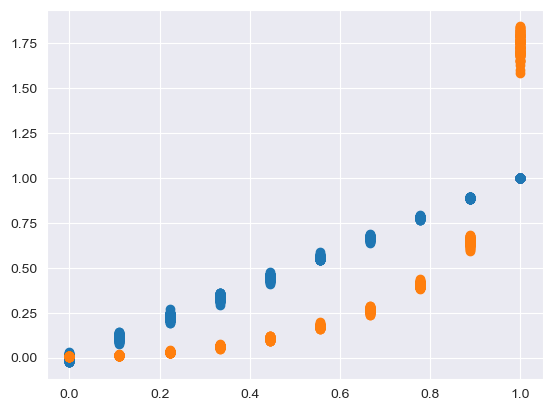

In [8]:
results_pearson = []
results_MI = []
for p in np.linspace(0, 1, 10):
    for _ in range(0, 100):
        data_2d = np.random.multivariate_normal(np.zeros(2), np.array([[1, p], [p, 1]]), n)
        results_pearson.append([p, pearsonr(data_2d[:, 0], data_2d[:, 1]).statistic])
        results_MI.append([p, mutual_info_score(create_buckets(data_2d[:, 0]), create_buckets(data_2d[:, 1]))])

results_MI = np.asarray(results_MI)
results_pearson = np.asarray(results_pearson)
plt.scatter(results_pearson[:, 0], results_pearson[:, 1])
plt.scatter(results_MI[:, 0], results_MI[:, 1])

#### bp 4)

A hint: note that mutual information between two correlated normal distributions i.e. when $(X, Y)\sim \mathcal{N}((0,0)', \Sigma)$ and
$$\Sigma = \begin{pmatrix}
        \sigma_x^2 & \rho \\ \rho & \sigma_y^2
    \end{pmatrix}$$
equals
$$I(X,Y) = \frac{1}{2}\log \left(\frac{\sigma_x^2\sigma_y^2}{\sigma_x^2\sigma_y^2 - \rho^2}\right).$$

In [9]:
def helper(p):
    return -np.log(1 - p ** 2) / 2

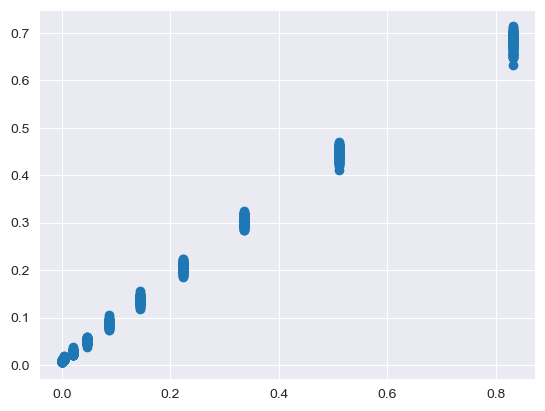

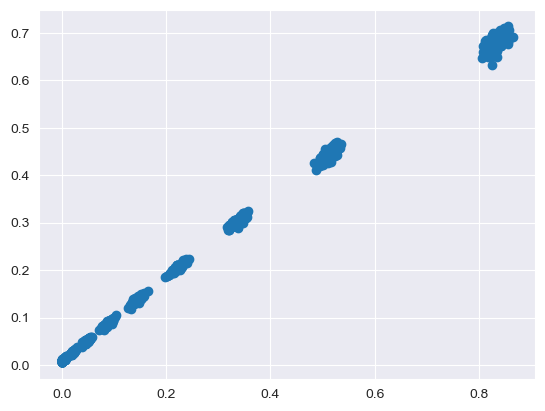

In [10]:
results_MI = []
results_MI_estimated_ro = []
for p in np.linspace(0, 0.9, 10):
    for _ in range(0, 100):
        data_2d = np.random.multivariate_normal(np.zeros(2), np.array([[1, p], [p, 1]]), n)
        results_MI.append([helper(p), mutual_info_score(create_buckets(data_2d[:, 0]), create_buckets(data_2d[:, 1]))])
        results_MI_estimated_ro.append([helper(pearsonr(data_2d[:, 0], data_2d[:, 1]).statistic),
                                        mutual_info_score(create_buckets(data_2d[:, 0]),
                                                          create_buckets(data_2d[:, 1]))])
results_MI = np.asarray(results_MI)
results_MI_estimated_ro = np.asarray(results_MI_estimated_ro)
plt.scatter(results_MI[:, 0], results_MI[:, 1])
plt.show()
plt.scatter(results_MI_estimated_ro[:, 0], results_MI_estimated_ro[:, 1])
plt.show()

### b)

#### bp 1)

In [11]:
# again: this is too time consuming so here is an answer

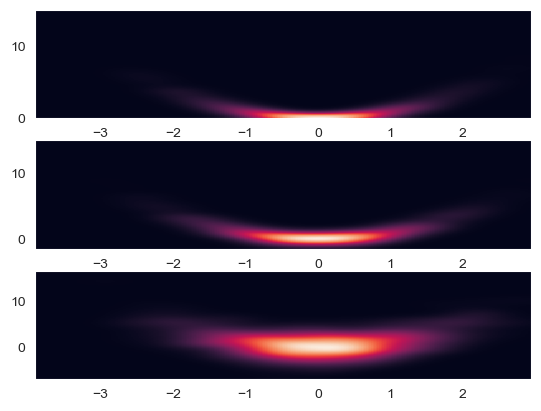

In [12]:
fig, axs = plt.subplots(3)

n = 1000
x = np.random.normal(0, 1, n)

data_2d = np.array([x, x ** 2 + np.random.normal(0, 0, n)]).T
xi_0, yi_0, zi_0 = plot_xyz(data_2d)
data_2d = np.array([x, x ** 2 + np.random.normal(0, 0.5, n)]).T
xi_1, yi_1, zi_1 = plot_xyz(data_2d)
data_2d = np.array([x, x ** 2 + np.random.normal(0, 2, n)]).T
xi_2, yi_2, zi_2 = plot_xyz(data_2d)

# Make the plot
axs[0].pcolormesh(xi_0, yi_0, zi_0.reshape(xi_0.shape), shading='auto')
axs[1].pcolormesh(xi_1, yi_1, zi_1.reshape(xi_1.shape), shading='auto')
axs[2].pcolormesh(xi_2, yi_2, zi_2.reshape(xi_2.shape), shading='auto')
plt.show()

#### bp 2) and 3)

In [13]:
def generate_data(sigma):
    n = 1000
    x = np.random.normal(0, 1, n)

    data_2d = np.array([x, x ** 2 + np.random.normal(0, sigma, n)]).T

    return data_2d

In [14]:
N = 100
results_MI = {}
results_pearson = {}

df = pd.DataFrame(columns=['sigma', 'category', 'value'])

for sigma in np.linspace(0, 2, 5):
    for i in range(N):
        data_2d = generate_data(sigma)

        df.loc[-1] = [sigma, 'pearson', pearsonr(data_2d[:, 0], data_2d[:, 1]).statistic]
        df.index = df.index + 1
        df = df.sort_index()

        df.loc[-1] = [sigma, 'MI', mutual_info_score(create_buckets(data_2d[:, 0]), create_buckets(data_2d[:, 1]))]
        df.index = df.index + 1
        df = df.sort_index()

    #     l_pearson.append()
    #     l_MI.append()
    # results_MI[sigma] = l_MI
    # results_pearson[sigma] = l_pearson


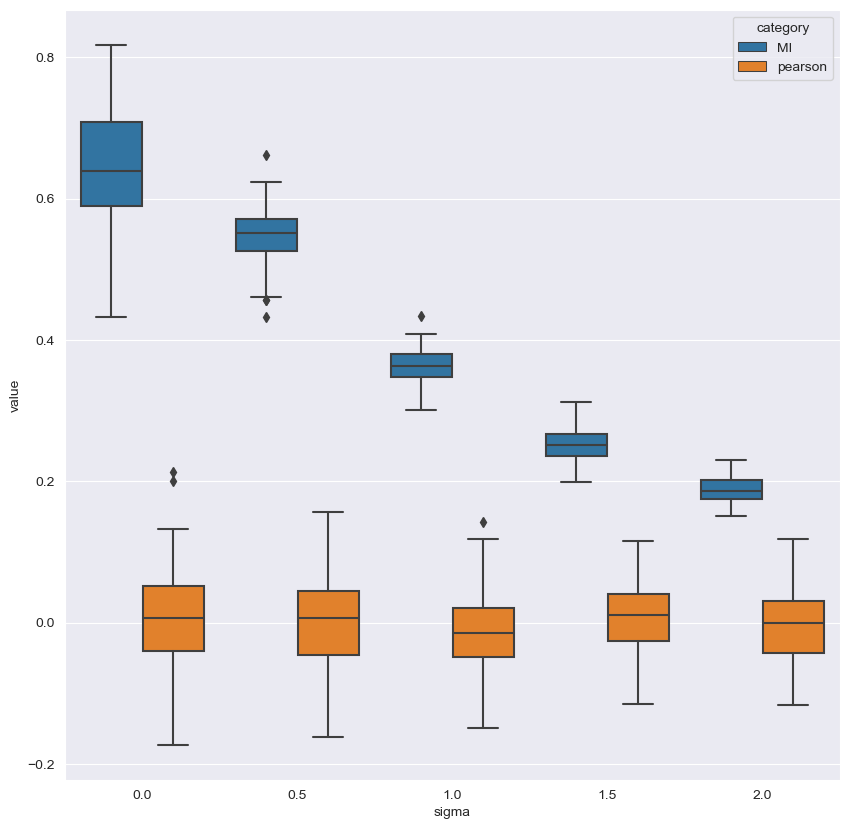

In [15]:
fig = plt.figure(figsize=(10, 10))
sns.boxplot(data=df, x="sigma", y="value", hue="category")
plt.show()

## Task 2

### a)

In [16]:
def mutual_information_test(X, Y):
    X = create_buckets(X)
    Y = create_buckets(Y)

    mutual_info = mutual_info_score(X, Y)
    test_statistic = 2 * n * mutual_info
    deg_free = (len(np.unique(X)) - 1) * (len(np.unique(Y)) - 1)

    return test_statistic, 1 - chi2.cdf(test_statistic, deg_free)


def pearson_chi_square_test(X, Y):
    contingency_table = np.histogram2d(X, Y, bins=10)[0]
    test_statistic, p_value, _, _ = stats.chi2_contingency(contingency_table)
    return test_statistic, p_value


def asymptotic_independence_test(X, Y, statistic="mi"):
    if statistic == 'mi':
        test_statistic, p_value = mutual_information_test(X, Y)
    else:
        test_statistic, p_value = pearson_chi_square_test(X, Y)

    return test_statistic, p_value

### b)

In [17]:
def independence_test_permutation(X, Y, B):
    X = create_buckets(X)
    Y = create_buckets(Y)

    mi = mutual_info_score(X, Y)
    mi_permutation = np.zeros(B)

    for i in range(B):
        mi_permutation[i] = mutual_info_score(np.random.permutation(X), Y)

    p_value = (1 + sum(np.array(mi <= mi_permutation))) / (1 + B)

    return mi, p_value

### c)

**Independent r.v.**

A hint: two discretized independent normal random variables (or any two independent discrete r.v.)

In [18]:
# independent r.v. - we expect that our tests don't reject the null hypothesis

np.random.seed(111)
X = np.random.normal(0, 1, 2000)
Y = np.random.normal(0, 1, 2000)

In [19]:
asymptotic_independence_test(X, Y, statistic="mi")

(40.61616545278897, 0.9999489777956169)

In [20]:
asymptotic_independence_test(X, Y, statistic="chi2")

(69.75883998780952, 0.8091229431178651)

In [21]:
independence_test_permutation(X, Y, 1000)

(0.020308082726394484, 0.4165834165834166)

**Dependent r.v.**

A hint: two discretized dependent normal random variables (or two categorical wuch that we enforce $X=Y$ for a subset of observations)

In [22]:
# dependent r.v. - ideally we will reject the null hypothesis

np.random.seed(111)
X = np.random.normal(0, 1, 1000)
Y = np.hstack([X[:500], np.random.normal(1, 1, 500)])

In [23]:
asymptotic_independence_test(X, Y, statistic="mi")

(753.0673619372836, 0.0)

In [24]:
asymptotic_independence_test(X, Y, statistic="chi2")

(1676.6278727230324, 2.0470277841444674e-296)

In [25]:
independence_test_permutation(X, Y, 1000)

(0.3765336809686418, 0.000999000999000999)